# #100Viz 03: Reckoning Roots

Source: INEGI, Encuesta Intercensal 2015. <br>
Shapefile: Empirical Studies of Conflict, Princeton. <br>
Notes: TBD.

***
**Set up**

In [9]:
import altair as alt
import json
%run "scripts/cimarron_theme_mod.py"

In [2]:
%%html
<style>
@import url("https://fonts.googleapis.com/css?family=Ubuntu|Ubuntu+Condensed|Ubuntu+Mono");
</style>

In [3]:
with open("../data/processed/data.geojson", "r") as geojson:
    rates = json.load(geojson)

In [4]:
data  = alt.InlineData(values = rates, #geopandas to geojson string
                       # root object type is "FeatureCollection" but we need its features
                       format = alt.DataFormat(property='features',type='json')) 

In [5]:
# too many rows ?
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [19]:
base = alt.Chart(data).mark_geoshape().encode(
    color = alt.Color("properties.rate:Q", legend = alt.Legend(title = "% that id's as black", )),
).properties(
    title = "03 Reckoning Roots",
    height = 780,
    width =1080,
)

In [11]:
base.save("map.html", format = "html")

In [16]:
text = alt.pd.DataFrame({'a': [2,4,5], 'b': [1,3,4]})

source = alt.Chart(text).mark_text(text = "Source: INEGI, Encuesta Intercensal 2015", size = 20, dx = 400).properties(width=1080, height = 80)

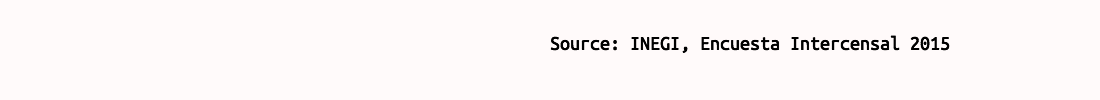

In [17]:
source

In [20]:
final = base & source
final.save("map_w_source.html", format = "html")